In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# df = pd.read_csv("pca_transformed_output.csv")

# X = df.drop(columns=["label"], axis=1)
# y = np.ravel(df[["label"]])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean CV Score: {cv_scores.mean()}")

# plt.figure(figsize=(6, 5))
# plt.boxplot(cv_scores, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
# plt.axvline(x=cv_scores.mean(), color='red', linestyle='--', label='Mean Accuracy')
# plt.title('Cross-Validation Accuracy Scores')
# plt.xlabel('Accuracy')
# plt.legend()
# plt.show()

# log_reg.fit(X_train, y_train)

NameError: name 'np' is not defined

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display

df = pd.read_csv('pca_transformed_output.csv')
display(df.head())

print(df['label'].value_counts())

,PC1,PC2,PC3,PC4,PC5,label
0,-2.260593,-0.344510,-1.609809,-1.053710,0.947905,0
1,-0.133474,3.105938,1.462322,0.828849,-1.380897,0
2,-1.977600,-0.341556,-1.687737,-1.246947,1.309119,0
3,-1.479357,0.897614,-0.858482,1.035689,-0.989909,0
4,-1.680400,2.221787,-1.015449,2.698644,1.534467,1


label
0    4132
1    4128
Name: count, dtype: int64


#### **Logistic Regression Model**

Average Precision: 0.7920
Average Recall: 0.7912
Average F1 Score: 0.7910
Average Accuracy: 0.7912


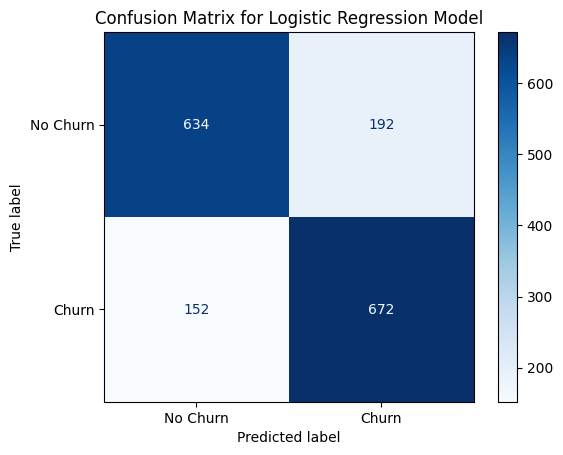

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

k = 5
kf = KFold(n_splits =  k, shuffle=True, random_state=42)

X = df.drop(columns = ['label'])
y = df[['label']]
feature_names = X.columns

logistic_regression_model = LogisticRegression(random_state=42)

precision_list, recall_list, f1_list, accuracy_list, confusion_matrices_list = [], [], [], [], []

y = np.ravel(y)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logistic_regression_model.fit(X_train, y_train)
    predicted_values = logistic_regression_model.predict(X_test)

    precision_list.append(precision_score(y_test, predicted_values, average='weighted'))
    recall_list.append(recall_score(y_test, predicted_values, average='weighted'))
    f1_list.append(f1_score(y_test, predicted_values, average='weighted'))
    accuracy_list.append(accuracy_score(y_test, predicted_values))
    confusion_matrices_list.append(confusion_matrix(y_test, predicted_values))

print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")

aggregate_conf_matrix = sum(confusion_matrices_list)
average_conf_matrix = aggregate_conf_matrix // 5

ConfusionMatrixDisplay(confusion_matrix=average_conf_matrix, display_labels=['No Churn', 'Churn']).plot(cmap = 'Blues')
plt.title('Confusion Matrix for Logistic Regression Model')

plt.show()